In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nd2reader import ND2Reader

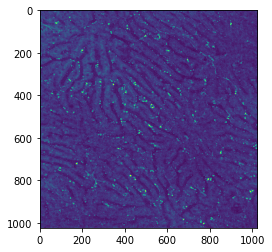

In [2]:
# Open .nd2 file and show the first frame.

f_path = # 'PATH_TO_YOUR_nd.2_FILE'
with ND2Reader(f_path) as images:
    plt.imshow(images[0], cmap = "viridis")

In [3]:
print(images.metadata['height'])
print(images.metadata['width'])
print(images.metadata['frames'])
print(images.metadata['channels'])
print(images.metadata['pixel_microns'])

1024
1024
range(0, 216)
['SHG', 'EGFP']
0.621480569402239


In [4]:
# Convert .nd2 images (12 bit) to a np.array (8 bit) 

# param c: The color channel 
# The .nd2 file analyzed in this notebook contains two channels, ['SHG', 'EGFP'].
# To analyze the 'SHG' channel images, set c=0.

temp = []
with ND2Reader(f_path) as images:
    for i in images.metadata['frames']:
        temp.append(images.get_frame_2D(c=0, t=i, z=0, x=0, y=0, v=0))
        
temp_uint8 = np.array(np.floor(np.array(temp)/16), dtype='uint8')
print(temp_uint8.shape)

(216, 1024, 1024)


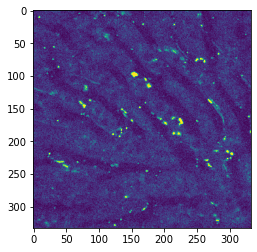

In [5]:
# A portion of the image should be cut out to check if the ROI is properly set.
# temp_uint8[first_rame_of_analysis:last_frame_of_analysis, y1:y2, x1:x2]

temp_uint8_part = temp_uint8[0:110, 680:1013, 270:603]

plt.imshow(temp_uint8_part[0])

In [6]:
# Preparation of circular mask

# h (int)
# w (int)
# center (tuple) = central coordinate of the circular mask (CENTER_X, CENTER_Y)
# radius (int) = radius of the circular mask

def create_circular_mask(h, w, center, radius):
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center <= radius
    return mask

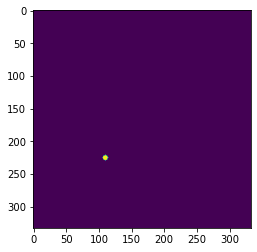

In [7]:
# ROI setting

CENTER_X = 110
CENTER_Y = 225
RADIUS = 4   # liver radius = 4, kidney radius = 7

ROI1 = create_circular_mask(temp_uint8_part.shape[1], temp_uint8_part.shape[2], center=(CENTER_X, CENTER_Y), radius=RADIUS)
plt.imshow(ROI1)

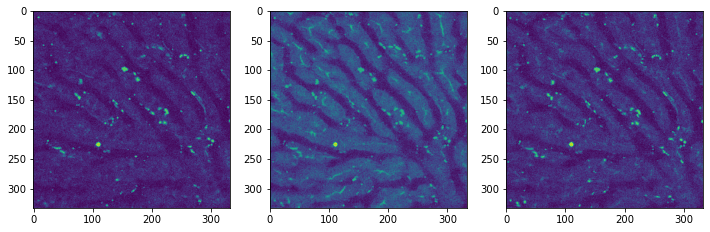

In [8]:
#　Display several frames (0th , 40th, 100th frames for example) to confirm that the ROI is set in the cytoplasm.

ROI1_img = np.array(ROI1, dtype=int)*255 + temp_uint8_part

fig = plt.figure(figsize=(12,24))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(ROI1_img[0])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(ROI1_img[40])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(ROI1_img[100])


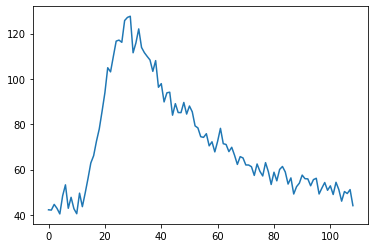

In [9]:
temp_uint8_part_ROI1 = temp_uint8_part * np.array(ROI1, dtype='uint8')

ROI1_count = []
for i in range(temp_uint8_part_ROI1.shape[0]):
    ROI1_count.append(temp_uint8_part_ROI1[i][ROI1])

ROI1_mean_count = []
for i in ROI1_count:
    ROI1_mean_count.append(np.mean(i))

plt.plot(ROI1_mean_count)